### 1. Download/ Load SP500 stocks prices data

In [70]:
!uv add numpy==2.2.6

Resolved 143 packages in 18ms                                        
Audited 140 packages in 14ms


In [77]:
!uv sync

Resolved 143 packages in 2ms
Audited 140 packages in 2ms


In [ ]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
# import pandas_ta
import warnings
warnings.filterwarnings('ignore')

import requests

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
sp500 = pd.read_html(response.text)[0]
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [14]:
sp500["Symbol"] = sp500["Symbol"].str.replace(".", "-")
symbol_list = list(sp500.Symbol.unique())
symbol_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APP',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',
 'COO',


In [16]:
end_date = pd.to_datetime(dt.datetime.now())

# start_date - 8 years from today
start_date = pd.to_datetime(end_date) - pd.DateOffset(8*365)

start_date, end_date

(Timestamp('2017-12-07 18:13:01.435014'),
 Timestamp('2025-12-05 18:13:01.435014'))

In [28]:
df = yf.download(
    tickers=symbol_list,
    start=start_date,
    end=end_date,
    auto_adjust=False
)
stock_data

[*********************100%***********************]  503 of 503 completed


Price        Adj Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2017-12-07   62.802727   39.653374   66.939621         NaN   47.518059   
2017-12-08   63.433495   39.665062   68.154251         NaN   47.474606   
2017-12-11   63.075752   40.437908   68.523613         NaN   47.735268   
2017-12-12   63.132248   40.210739   68.402863         NaN   48.395611   
2017-12-13   62.774483   40.344238   69.148712         NaN   47.839531   
...                ...         ...         ...         ...         ...   
2025-11-28  153.500000  278.850006  227.699997  116.989998  128.899994   
2025-12-01  150.100006  283.100006  225.110001  118.800003  128.009995   
2025-12-02  148.809998  286.190002  224.369995  118.500000  126.320000   
2025-12-03  149.259995  284.149994  230.240005  120.129997  125.290001   
2025-12-04  148.320007  280.700012  228.710007  120.820000  125.400002   

Price                                                                 ...  \
Ticker           ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2017-12-07  29.113344  132.051376  174.610001   74.511879  32.607346  ...   
2017-12-08  29.164059  133.766434  173.570007   74.001328  32.765213  ...   
2017-12-11  29.341558  133.908615  174.309998   74.243614  33.073040  ...   
2017-12-12  29.240129  135.161575  172.539993   73.966721  32.970436  ...   
2017-12-13  28.685440  134.557312  176.830002   73.707130  31.612783  ...   
...               ...         ...         ...         ...        ...  ...   
2025-11-28  93.919998  250.000000  320.130005  265.339996  60.740002  ...   
2025-12-01  93.160004  257.429993  322.850006  266.510010  60.520000  ...   
2025-12-02  92.690002  261.019989  322.809998  272.970001  60.310001  ...   
2025-12-03  92.720001  272.850006  326.779999  278.239990  59.799999  ...   
2025-12-04  92.389999  269.339996  328.730011  277.260010  59.360001  ...   

Price        Volume                                                          \
Ticker           WY     WYNN      XEL       XOM      XYL       XYZ      YUM   
Date                                                                          
2017-12-07  1787600  1155700  2685800  11359600   744500  23721600  1580700   
2017-12-08  2270900  1066900  2742200  11988600   681300  20917800  1877100   
2017-12-11  2124600  2596700  3368300   8760700   721200  15780200  1643900   
2017-12-12  3228500  1610900  3308300  11307000   999000  18834100  1628500   
2017-12-13  2567000  1355200  2857600  10172700   979600  25376200  1640900   
...             ...      ...      ...       ...      ...       ...      ...   
2025-11-28  3648900   861200  1364400   7240800  1554300   3459900   923300   
2025-12-01  7107800  2831000  3885400  12658100  1395700   8119900  3536400   
2025-12-02  5232900  1215100  4616700  14607700  1191600  20737700  1781300   
2025-12-03  4806800  1137300  3625800  16819100  1321400  13314700  2259700   
2025-12-04  4730400  2609800  6758000  13684500  1014900   6958100  2356700   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2017-12-07   989521  341800  2694400  
2017-12-08  1731018  174200  1640000  
2017-12-11  1179247  180000  1172500  
2017-12-12  1642232  253300  1939900  
2017-12-13  2899965  176700  1595100  
...             ...     ...      ...  
2025-11-28   890000  206400  2143000  
2025-12-01  2594200  475800  4206900  
2025-12-02  1536400  486200  6896900  
2025-12-03  1984600  593500  5019700  
2025-12-04  2177500  507800  4938900  

[2009 rows x 3018 columns]

In [32]:
stock_data = stock_data.stack().reset_index()
stock_data.columns = [x.lower().replace(" ", "_") for x in stock_data.columns]
stock_data

,date,ticker,adj_close,close,high,low,open,volume
0,2017-12-07,A,62.802727,66.709999,66.879997,65.769997,65.910004,2294500.0
1,2017-12-07,AAPL,39.653374,42.330002,42.610001,42.227501,42.257500,102693200.0
2,2017-12-07,ABBV,66.939621,94.239998,94.570000,92.900002,94.029999,4524500.0
3,2017-12-07,ABT,47.518059,54.689999,54.939999,54.349998,54.759998,4421900.0
4,2017-12-07,ACGL,29.113344,30.616667,30.966667,30.549999,30.843332,1190700.0
...,...,...,...,...,...,...,...,...
986852,2025-12-04,XYZ,62.189999,62.189999,62.220001,60.700001,61.290001,6958100.0
986853,2025-12-04,YUM,145.860001,145.860001,149.139999,145.500000,147.610001,2356700.0
986854,2025-12-04,ZBH,93.160004,93.160004,93.250000,92.139999,92.750000,2177500.0
986855,2025-12-04,ZBRA,263.049988,263.049988,264.239990,259.600006,259.869995,507800.0


### 2. Calculate features and technical indicators for each stock
- Garman-Klass Volitality
- RSI
- Bollinger Band
- ATR
- MACD
- Dollor Volume

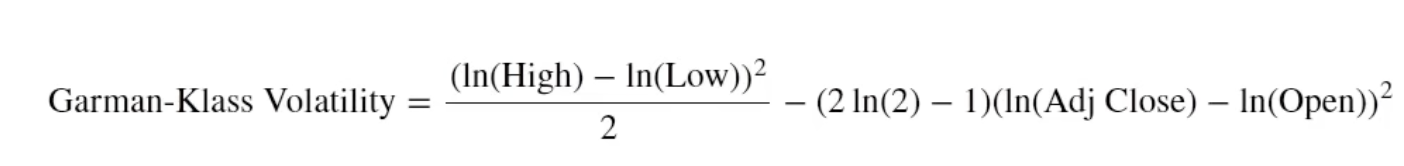

In [50]:
stock_data['garman_klass_vol'] = (
    (((np.log(stock_data['high']) - np.log(stock_data['low']))**2) / 2) 
    - 
    (
        (2*np.log(2) - 1) * (
            np.log(stock_data['adj_close']) - np.log(stock_data['open'])
        )**2
    )
)
stock_data

,date,ticker,adj_close,close,high,low,open,volume,garman_klass_vol
0,2017-12-07,A,62.802727,66.709999,66.879997,65.769997,65.910004,2294500.0,-0.000761
1,2017-12-07,AAPL,39.653374,42.330002,42.610001,42.227501,42.257500,102693200.0,-0.001522
2,2017-12-07,ABBV,66.939621,94.239998,94.570000,92.900002,94.029999,4524500.0,-0.044450
3,2017-12-07,ABT,47.518059,54.689999,54.939999,54.349998,54.759998,4421900.0,-0.007715
4,2017-12-07,ACGL,29.113344,30.616667,30.966667,30.549999,30.843332,1190700.0,-0.001195
...,...,...,...,...,...,...,...,...,...
986852,2025-12-04,XYZ,62.189999,62.189999,62.220001,60.700001,61.290001,6958100.0,0.000224
986853,2025-12-04,YUM,145.860001,145.860001,149.139999,145.500000,147.610001,2356700.0,0.000250
986854,2025-12-04,ZBH,93.160004,93.160004,93.250000,92.139999,92.750000,2177500.0,0.000064
986855,2025-12-04,ZBRA,263.049988,263.049988,264.239990,259.600006,259.869995,507800.0,0.000100


In [80]:
# Making custom function for RSI calculation

import pandas as pd

def calculate_rsi(prices, period=14):
    """
    prices: pandas Series containing price data (closing prices)
    period: number of days for RSI (default = 14)
    """

    # Calculate price changes
    delta = prices.diff()

    # Separate gains (positive deltas) and losses (negative deltas)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate the exponential moving averages (Wilder's smoothing)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    # After the initial period, switch to Wilder's smoothing:
    # avg_gain = (previous_avg_gain * (period - 1) + current_gain) / period
    # avg_loss = (previous_avg_loss * (period - 1) + current_loss) / period
    avg_gain = avg_gain.combine_first(
        gain.ewm(alpha=1/period, adjust=False).mean()
    )
    avg_loss = avg_loss.combine_first(
        loss.ewm(alpha=1/period, adjust=False).mean()
    )

    # Calculate RS (Relative Strength)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [83]:
stock_data['rsi_20'] = stock_data.groupby(by='ticker')['adj_close'].transform(lambda x: calculate_rsi(prices=x, period=20))
stock_data

,date,ticker,adj_close,close,high,low,open,volume,garman_klass_vol,RSI_20,rsi_20
0,2017-12-07,A,62.802727,66.709999,66.879997,65.769997,65.910004,2294500.0,-0.000761,NaN,NaN
1,2017-12-07,AAPL,39.653374,42.330002,42.610001,42.227501,42.257500,102693200.0,-0.001522,NaN,NaN
2,2017-12-07,ABBV,66.939621,94.239998,94.570000,92.900002,94.029999,4524500.0,-0.044450,NaN,NaN
3,2017-12-07,ABT,47.518059,54.689999,54.939999,54.349998,54.759998,4421900.0,-0.007715,NaN,NaN
4,2017-12-07,ACGL,29.113344,30.616667,30.966667,30.549999,30.843332,1190700.0,-0.001195,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
986852,2025-12-04,XYZ,62.189999,62.189999,62.220001,60.700001,61.290001,6958100.0,0.000224,34.479960,34.479960
986853,2025-12-04,YUM,145.860001,145.860001,149.139999,145.500000,147.610001,2356700.0,0.000250,45.284837,45.284837
986854,2025-12-04,ZBH,93.160004,93.160004,93.250000,92.139999,92.750000,2177500.0,0.000064,64.303917,64.303917
986855,2025-12-04,ZBRA,263.049988,263.049988,264.239990,259.600006,259.869995,507800.0,0.000100,48.020167,48.020167


<Axes: >

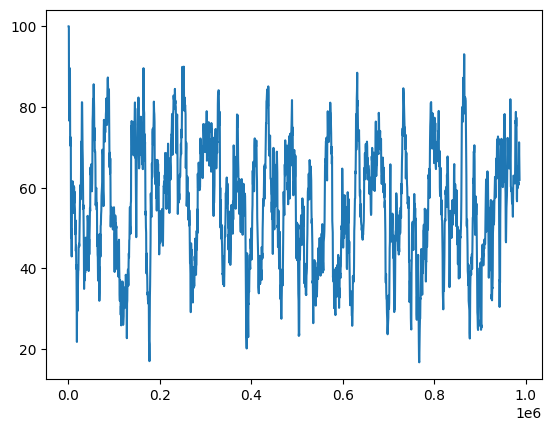

In [87]:
stock_data[stock_data.ticker == 'AAPL']['rsi_20'].plot()

In [115]:
# Custom Function to calculate Bollinger bands 
import pandas as pd

def bollinger_bands(prices, period=20, std_multiplier=2, band='mid'):
    """
    prices: pandas Series of closing prices
    period: moving average period (default = 20)
    std_multiplier: number of standard deviations (default = 2)
    """

    log_prices = np.log1p(prices)
    
    # Middle Band = Simple Moving Average (SMA)
    middle_band = log_prices.rolling(window=period).mean()

    # Standard deviation for the same window
    std = log_prices.rolling(window=period).std()

    # Upper Band = SMA + (std × multiplier)
    upper_band = middle_band + (std_multiplier * std)

    # Lower Band = SMA - (std × multiplier)
    lower_band = middle_band - (std_multiplier * std)

    if band.lower() == 'mid':
        band = middle_band
    elif band.lower() == 'low':
        band = lower_band
    elif band.lower() == 'high':
        band = upper_band
    else:
        ValueError("band should be - mid/low/high")
    return band

In [123]:
stock_data['bb_mid'] = stock_data.groupby('ticker')['adj_close'].transform(lambda x: bollinger_bands(x, period=20, std_multiplier=2, band='mid'))
stock_data['bb_low'] = stock_data.groupby('ticker')['adj_close'].transform(lambda x: bollinger_bands(x, period=20, std_multiplier=2, band='low'))
stock_data['bb_high'] = stock_data.groupby('ticker')['adj_close'].transform(lambda x: bollinger_bands(x, period=20, std_multiplier=2, band='high'))
stock_data

,date,ticker,adj_close,close,high,low,open,volume,garman_klass_vol,rsi_20,bb_mid,bb_high,bb_low
0,2017-12-07,A,62.802727,66.709999,66.879997,65.769997,65.910004,2294500.0,-0.000761,NaN,NaN,NaN,NaN
1,2017-12-07,AAPL,39.653374,42.330002,42.610001,42.227501,42.257500,102693200.0,-0.001522,NaN,NaN,NaN,NaN
2,2017-12-07,ABBV,66.939621,94.239998,94.570000,92.900002,94.029999,4524500.0,-0.044450,NaN,NaN,NaN,NaN
3,2017-12-07,ABT,47.518059,54.689999,54.939999,54.349998,54.759998,4421900.0,-0.007715,NaN,NaN,NaN,NaN
4,2017-12-07,ACGL,29.113344,30.616667,30.966667,30.549999,30.843332,1190700.0,-0.001195,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986852,2025-12-04,XYZ,62.189999,62.189999,62.220001,60.700001,61.290001,6958100.0,0.000224,34.479960,4.161816,4.259085,4.064548
986853,2025-12-04,YUM,145.860001,145.860001,149.139999,145.500000,147.610001,2356700.0,0.000250,45.284837,5.011844,5.040003,4.983685
986854,2025-12-04,ZBH,93.160004,93.160004,93.250000,92.139999,92.750000,2177500.0,0.000064,64.303917,4.528804,4.597195,4.460413
986855,2025-12-04,ZBRA,263.049988,263.049988,264.239990,259.600006,259.869995,507800.0,0.000100,48.020167,5.515974,5.605572,5.426376


In [130]:
# To calculate ATR
import pandas as pd

def calculate_atr_single(df, period=14):
    df = df.sort_values("date").copy()

    df["H-L"] = df["high"] - df["low"]
    df["H-PC"] = (df["high"] - df["close"].shift(1)).abs()
    df["L-PC"] = (df["low"] - df["close"].shift(1)).abs()

    df["TR"] = df[["H-L", "H-PC", "L-PC"]].max(axis=1)

    # Simple ATR with NaN for first period-1 rows
    df["atr"] = df["TR"].rolling(window=period, min_periods=period).mean()

    return df['atr']


In [133]:
stock_data['atr'] = stock_data.groupby("ticker", group_keys=False).apply(calculate_atr_single).reset_index(drop=True)
stock_data

,date,ticker,adj_close,close,high,low,open,volume,garman_klass_vol,rsi_20,bb_mid,bb_high,bb_low,atr
0,2017-12-07,A,62.802727,66.709999,66.879997,65.769997,65.910004,2294500.0,-0.000761,NaN,NaN,NaN,NaN,NaN
1,2017-12-07,AAPL,39.653374,42.330002,42.610001,42.227501,42.257500,102693200.0,-0.001522,NaN,NaN,NaN,NaN,NaN
2,2017-12-07,ABBV,66.939621,94.239998,94.570000,92.900002,94.029999,4524500.0,-0.044450,NaN,NaN,NaN,NaN,NaN
3,2017-12-07,ABT,47.518059,54.689999,54.939999,54.349998,54.759998,4421900.0,-0.007715,NaN,NaN,NaN,NaN,NaN
4,2017-12-07,ACGL,29.113344,30.616667,30.966667,30.549999,30.843332,1190700.0,-0.001195,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986852,2025-12-04,XYZ,62.189999,62.189999,62.220001,60.700001,61.290001,6958100.0,0.000224,34.479960,4.161816,4.259085,4.064548,2.958570
986853,2025-12-04,YUM,145.860001,145.860001,149.139999,145.500000,147.610001,2356700.0,0.000250,45.284837,5.011844,5.040003,4.983685,2.931427
986854,2025-12-04,ZBH,93.160004,93.160004,93.250000,92.139999,92.750000,2177500.0,0.000064,64.303917,4.528804,4.597195,4.460413,3.143570
986855,2025-12-04,ZBRA,263.049988,263.049988,264.239990,259.600006,259.869995,507800.0,0.000100,48.020167,5.515974,5.605572,5.426376,3.239999
